pandas project

índice:
1. importación
2. exploración de los datos
3. toma de decisiones
4. data cleaning
5. análisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('GSAF5.csv', encoding = "ISO-8859-1")
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


la importación daba un error:
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte
Busqué este error y di con la solución en stackoverflow, que era añadir 'encoding = "ISO-8859-1"' como argumento al llamar a pd.read_csv

In [3]:
data.shape

(5992, 24)

In [4]:
# vamos a stripear y poner en minúsculas los nombres de las columnas, para que sea más fácil escribirlos
data.columns = data.columns.str.strip().str.lower()
data.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [5]:
# renombramos las columnas "case number" como "id" y "fatal (y/n)" como "fatal" para que sea más cómodo escribirlas
data = data.rename(columns = {"case number":"id", "fatal (y/n)": "fatal"})

In [6]:
# eliminar duplicados
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [7]:
#vemos las columnas que tenemos y cuántos valores null tienen
null_cols = data.isnull().sum()
null_cols

id                           0
date                         0
year                         0
type                         0
country                     43
area                       402
location                   496
activity                   527
name                       200
sex                        567
age                       2681
injury                      27
fatal                       19
time                      3213
species                   2934
investigator or source      15
pdf                          0
href formula                 1
href                         3
case number.1                0
case number.2                0
original order               0
unnamed: 22               5991
unnamed: 23               5990
dtype: int64

In [8]:
# eliminamos las columnas que contengan más de 2500 nulls
print(data.shape)
drop_cols = list(null_cols[null_cols > 2500].index)
data = data.drop(drop_cols, axis=1)
print(data.shape)

(5992, 24)
(5992, 19)


In [9]:
#nos quedamos solo con los datos posteriores a 1920
data = data[data.year >= 1920]
data.reset_index
data.shape

(5030, 19)

In [10]:
# nos quedamos con las columnas que nos interesan
data = data[["id", "year", "type", "country", "activity", "fatal"]]
data.shape

(5030, 6)

In [11]:
# comprobamos nulls
null_cols = data.isnull().sum()
null_cols

id            0
year          0
type          0
country      21
activity    395
fatal         8
dtype: int64

In [12]:
# eliminamos las filas que contienen nulls
data = data[data.country.notnull()]
data = data[data.activity.notnull()]
data = data[data.fatal.notnull()]
data.reset_index
data.shape

(4611, 6)

In [13]:
# comprobamos que ya no tenemos nulls en ningún campo
null_cols = data.isnull().sum()
null_cols

id          0
year        0
type        0
country     0
activity    0
fatal       0
dtype: int64

In [14]:
# vamos a cambiar el orden de las columnas, para ponerlas a nuestro gusto
column_order = ["id", "year", "country", "type", "activity", "fatal" ]
data = data[column_order]
data.head()

,id,year,country,type,activity,fatal
0,2016.09.18.c,2016,USA,Unprovoked,Surfing,N
1,2016.09.18.b,2016,USA,Unprovoked,Surfing,N
2,2016.09.18.a,2016,USA,Unprovoked,Surfing,N
3,2016.09.17,2016,AUSTRALIA,Unprovoked,Surfing,N
4,2016.09.15,2016,AUSTRALIA,Unprovoked,Surfing,N


In [15]:
# comprobamos si hay algún id duplicado. aquí tenemos que contar por una variable que no sea el id. cogemos year, ya que hemos visto que no tiene nulls
data.groupby("id").count()[["year"]].sort_values("year", ascending=False).head(11)

,year
id,
2013.10.05,2
1966.12.26,2
1923.00.00.a,2
2006.09.02,2
1962.06.11.b,2
2014.08.02,2
2009.12.18,2
1980.07.00,2
1990.05.10,2


In [16]:
"""
vamos a asignar ids únicos a los que están duplicados
la siguiente función evalúa todos los ids y, en caso de que, a la hora de evaluar uno de ellos,
ya exista otro registro con ese mismo id, le pone una "a" al final, para diferenciarlo.
"""
def duplicates(id_column):
    new_id_column = []
    for i in range(len(id_column)):
        new_id = str(id_column[i])
        if new_id not in new_id_column:
            new_id_column.append(new_id)
        else:
            new_id_column.append(new_id + "a")
    return new_id_column

In [17]:
# aplicamos la función duplicates para la columna id
data["id"] = duplicates(list(data["id"]))

In [18]:
# comprobamos ahora que solo existe un registro para cada id
data.groupby("id").count()[["year"]].sort_values("year", ascending=False).head(14)

,year
id,
1920.00.00.a,1
2006.09.30,1
2002.09.27.a,1
2002.09.21.b,1
2002.09.21.a,1
2002.09.16.b,1
2002.09.16.a,1
2002.09.13,1
2002.09.09,1


In [19]:
# vemos el contenido que existe en el campo "type"
data.groupby("type").count()[["id"]]

,id
type,
Boat,172
Boating,65
Invalid,321
Provoked,473
Sea Disaster,157
Unprovoked,3423


In [20]:
# unificar type Boat y Boating
data = data.replace({'type': "Boating"}, "Boat")

In [21]:
# comprobación
data.groupby("type").count()[["id"]]

,id
type,
Boat,237
Invalid,321
Provoked,473
Sea Disaster,157
Unprovoked,3423


In [22]:
# vemos cuales son los países en los que más ataques se han dado en los años tenidos en cuenta
data["country"] = data["country"].str.strip().str.title()
countries = data.groupby("country").count()[["id"]].sort_values("id", ascending = False)
display(countries)

,id
country,
Usa,1800
Australia,949
South Africa,483
Papua New Guinea,106
Brazil,92
Bahamas,85
New Zealand,80
Mexico,63
Reunion,50


In [23]:
# vemos el contenido que hay en el campo "fatal"
data.groupby("fatal").count()[["id"]].sort_values("id", ascending = False)

,id
fatal,
N,3640
Y,930
UNKNOWN,35
N,6


In [24]:
# vamos a aplicar strip() en la columna "fatal" para unificar datos
data["fatal"] = data["fatal"].str.strip()
# además, vemos que hay un registro con "F". entendemos que se refiere a fatal, así que lo cambiamos por "Y"
data = data.replace({"fatal": "F"}, "Y")

In [25]:
# comprobación
data.groupby("fatal").count()[["id"]].sort_values("id", ascending = False)

,id
fatal,
N,3646
Y,930
UNKNOWN,35


In [26]:
# vamos a aplicar .strip() y .lower() en la columna "activity" para unificar datos
data["activity"] = data["activity"].str.strip().str.lower()
data.groupby("activity").count()[["id"]].sort_values("id", ascending = False).head()

,id
activity,
surfing,903
swimming,686
fishing,349
spearfishing,322
wading,132


In [27]:
# a simple vista podemos ver que hemos conseguido unificar algunos datos
# ahora vamos a agrupar las activities en unos pocos grupos
def group_act(e):
    if "fish" in e:
        return "Fishing"
    elif "surf" in e:
        return "Surfing"
    elif "swim" in e:
        return "Swimming"
    elif "wading" in e or "wade" in e:
        return "Wading"
    elif "diving" in e or "dive" in e:
        return "Diving"
    elif "stand" in e:
        return "Standing"
    elif "board" in e:
        return "Boarding"
    elif "bath" in e:
        return "Bathing"
    elif "snorkel" in e:
        return "Snorkeling"
    else:
        return "Others"

In [28]:
data["activity"] = data["activity"].map(group_act)

In [29]:
data.groupby("activity").count()[["id"]].sort_values("id", ascending = False)

,id
activity,
Surfing,1145
Fishing,1062
Swimming,816
Others,618
Diving,411
Boarding,169
Wading,142
Standing,119
Snorkeling,77


In [30]:
data = data.reset_index(drop = True)

In [31]:
# añadimos columna con "20%", que dirá si los países se encuentran entre el 20% de los mismos que reciben más ataques
data["country20"] = data["country"]

In [32]:
countries20 = countries[:(len(countries))//5].transpose()
countries20col = list(countries20.columns)
countries80 = countries[(len(countries))//5:].transpose()
countries80col = list(countries80.columns)

In [33]:
data = data.replace({"country20": countries20col}, "Y")
data = data.replace({"country20": countries80col}, "N")

In [34]:
table = pd.pivot_table(data, values = "id", index="year",columns=["country20"], aggfunc=len, fill_value=0)
table

country20,N,Y
year,,
1920,1,13
1921,2,7
1922,3,18
1923,1,18
1924,1,18
1925,2,8
1926,3,16
1927,1,17
1928,0,21


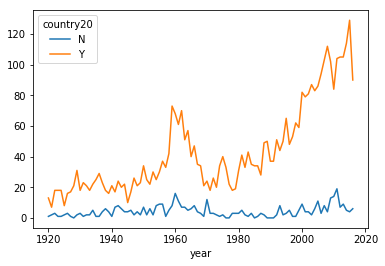

In [35]:
table.plot()
plt.show()